<a href="https://colab.research.google.com/github/bhopchi/Spine_X_ray_images_Classification_using_Pretrained_Models_with_Attention_Mechanism/blob/main/Spine_X_ray_images_Classification_using_Pretrained_Models_with_Attention_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Class  ImageCount
0  Normal          71
1    Scol         185
2   Spond          78


<ipython-input-2-a21485ce1bc5>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")


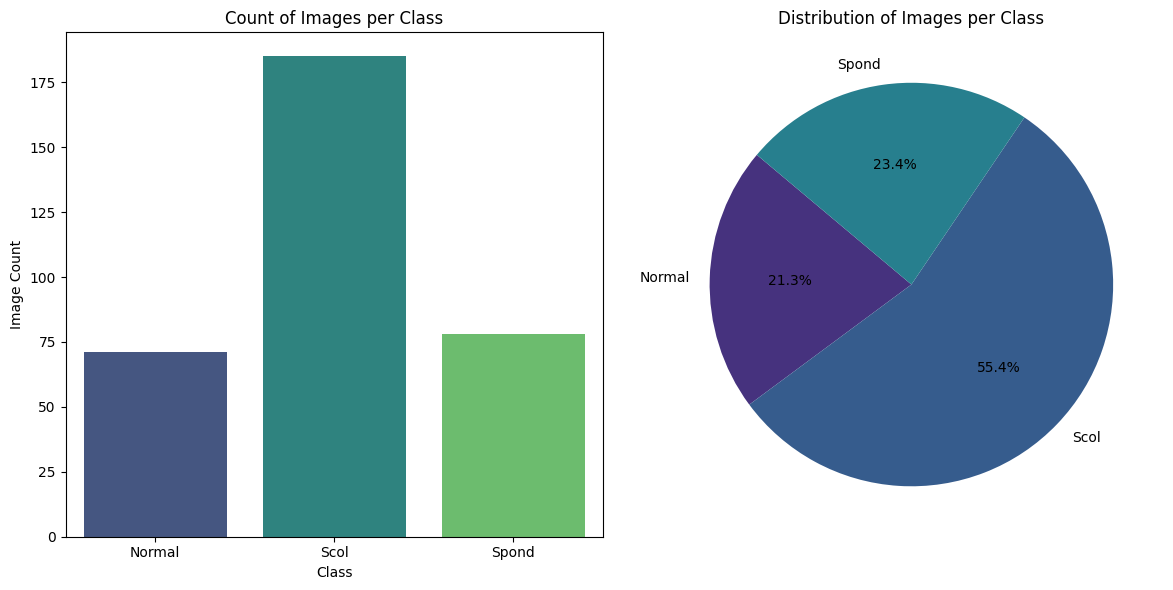

In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile # Import the zipfile module

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/the-vertebrae-xray-images.zip'
extract_dir = '/content/the-vertebrae-xray-images'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Define the base path for image folders
base_path = '/content/the-vertebrae-xray-images/xkt857dsxk-1/331/331'
classes = ['Normal', 'Scol', 'Spond']

# Initialize a dictionary to store image counts for each class
image_counts = {}

# Loop through each class and count the images
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

# Create a DataFrame from the image counts dictionary
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

# Display the DataFrame
print(df_counts)

# Plotting the data
plt.figure(figsize=(12, 6))

# Bar plot for image counts per class
plt.subplot(1, 2, 1)
sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

# Pie chart for image distribution per class
plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


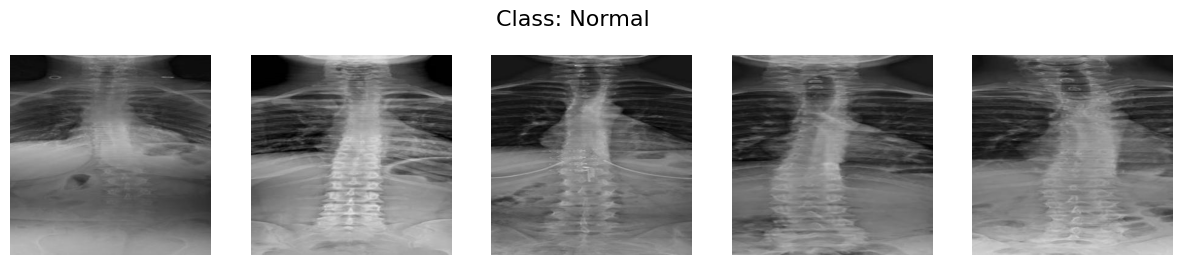

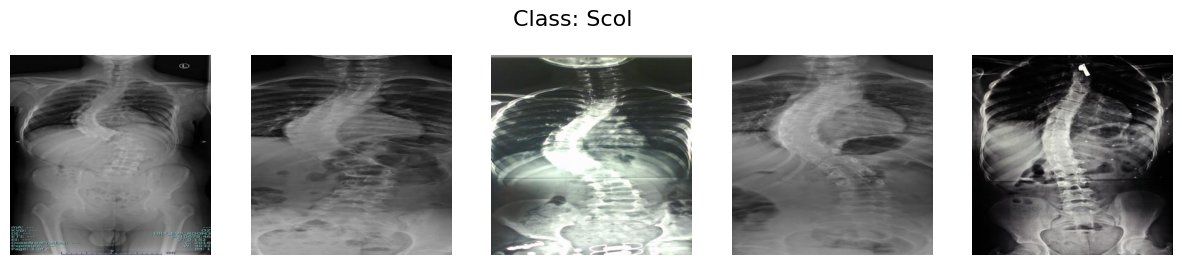

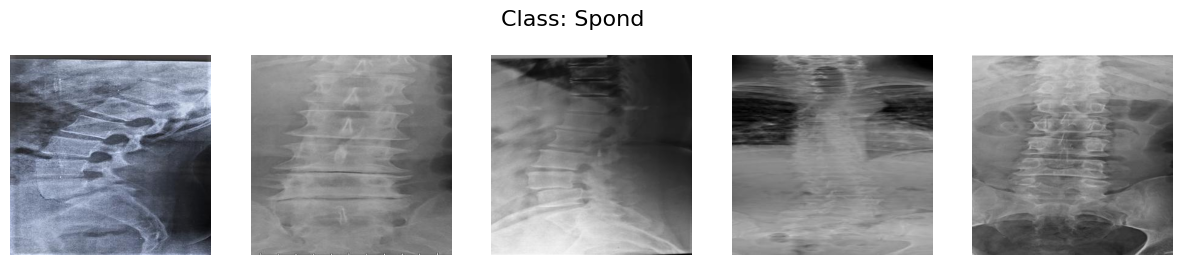

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Loop through each class, select the first 5 images, and plot them
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images

    # Set up the figure for displaying images
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)

    # Loop through the first 5 images in the folder
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)

        # Display the image
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()

In [4]:
dataset_path = base_path
image_data = []
folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

df = pd.DataFrame(image_data, columns=['image_path', 'label'])
df.head()

,image_path,label
0,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
1,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
2,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
3,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
4,/content/the-vertebrae-xray-images/xkt857dsxk-...,1


In [22]:
!pip install --upgrade gspread

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from google.colab import sheets

# Now try to create the InteractiveSheet
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1XdS-yEY86XJLWA0-7-uzN_uyA6SY4W1_fPv3V3dvOvo#gid=0


In [5]:
df.tail()

,image_path,label
333,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
334,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
335,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
336,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
337,/content/the-vertebrae-xray-images/xkt857dsxk-...,3


In [6]:
df.shape

(338, 2)

In [7]:
import pandas as pd  # Ensure pandas is imported
df.columns
pd.Index(['image_path', 'label'], dtype='object') # Use pd.Index to create an Index object
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
image_path,0
label,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [10]:
from imblearn.over_sampling import RandomOverSampler

# Assuming df is already defined and contains 'image_path' and 'label' columns
ros = RandomOverSampler(random_state=42)

# Apply Random Over Sampling
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

# Create a new DataFrame for resampled data
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())



Class distribution after oversampling:
label
1    188
2    188
3    188
Name: count, dtype: int64


In [11]:
df_resampled

,image_path,label
0,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
1,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
2,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
3,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
4,/content/the-vertebrae-xray-images/xkt857dsxk-...,1
...,...,...
559,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
560,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
561,/content/the-vertebrae-xray-images/xkt857dsxk-...,3
562,/content/the-vertebrae-xray-images/xkt857dsxk-...,3


In [12]:
import time
import shutil

In [13]:
import pathlib
import itertools
from PIL import Image
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Checkpoint to confirm the code is running
print('Check')

# Convert labels to string type
df_resampled['label'] = df_resampled['label'].astype(str)

# Split the data into training and validation/test sets
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']
)
valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

# Image data generator parameters
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


Check


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for training and validation/test sets
tr_gen = ImageDataGenerator(rescale=1.0 / 255)  # For training data
ts_gen = ImageDataGenerator(rescale=1.0 / 255)  # For validation and test data

# Create a generator for the training dataset
train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Create a generator for the validation dataset
valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Create a generator for the test dataset
test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,  # No shuffling for test data
    batch_size=batch_size
)


Found 451 validated image filenames belonging to 3 classes.
Found 56 validated image filenames belonging to 3 classes.
Found 57 validated image filenames belonging to 3 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout,
    BatchNormalization,
    GaussianNoise,
    Input,
    MultiHeadAttention,
    Reshape
)
from tensorflow.keras.optimizers import Adam

# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Function to create the Xception model
def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048  # This should match the output size of the base model
    x = Reshape((height * width, channels))(x)

    # Multi-head attention
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)

    # Adding noise and pooling
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    # Output layer
    outputs = Dense(3, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (224, 224, 3)

# Create and compile the model
cnn_model = create_xception_model(input_shape)
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Fit the model
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)


Using GPU
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 788ms/step - accuracy: 0.7748 - loss: 0.5835 - val_accuracy: 0.9464 - val_loss: 0.1974
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.9712 - loss: 0.1193 - val_accuracy: 0.9821 - val_loss: 0.1244
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.9742 - loss: 0.1087 - val_accuracy: 0.9464 - val_loss: 0.1964
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.9787 - loss: 0.0627 - val_accuracy: 0.8929 - val_loss: 0.2927
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.9537 - loss: 0.1142 - val_accuracy: 0.9821 - val_loss: 0.0686


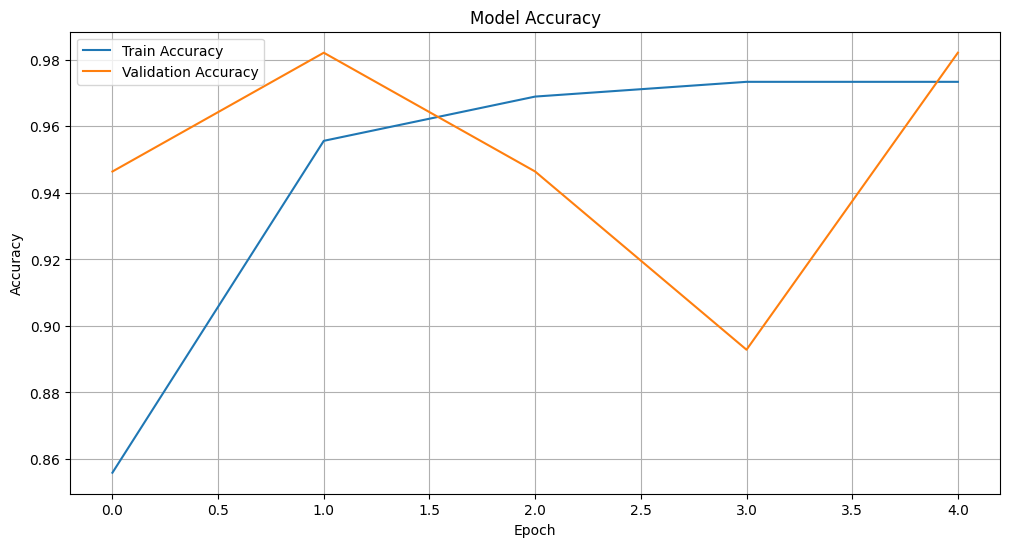

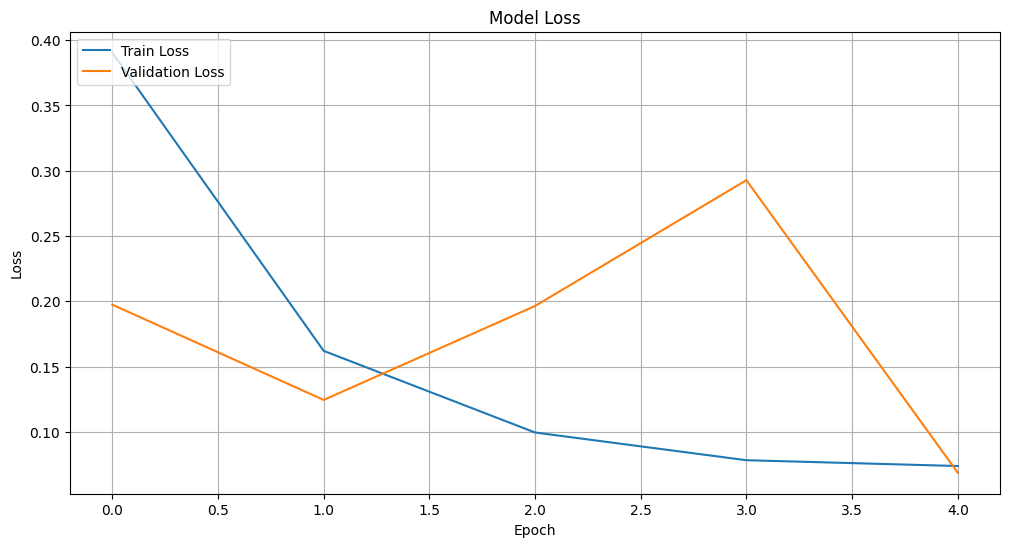

In [16]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Plotting loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [17]:
import numpy as np

# Get true labels for the test dataset
test_labels = test_gen_new.classes

# Make predictions on the test dataset
predictions = cnn_model.predict(test_gen_new)

# Convert predictions to predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Display results
print("True labels:", test_labels)
print("Predicted classes:", predicted_classes)


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step
True labels: [1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0]
Predicted classes: [1 0 0 2 1 0 0 0 0 2 2 2 0 1 2 2 0 2 0 1 2 0 0 0 2 1 0 2 0 1 1 1 0 0 2 0 2
 0 2 2 0 2 0 1 0 1 1 1 2 0 1 1 2 2 2 1 0]


In [18]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(
    test_labels,
    predicted_classes,
    target_names=list(test_gen_new.class_indices.keys())
)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           1       0.83      1.00      0.90        19
           2       0.93      0.74      0.82        19
           3       0.95      0.95      0.95        19

    accuracy                           0.89        57
   macro avg       0.90      0.89      0.89        57
weighted avg       0.90      0.89      0.89        57



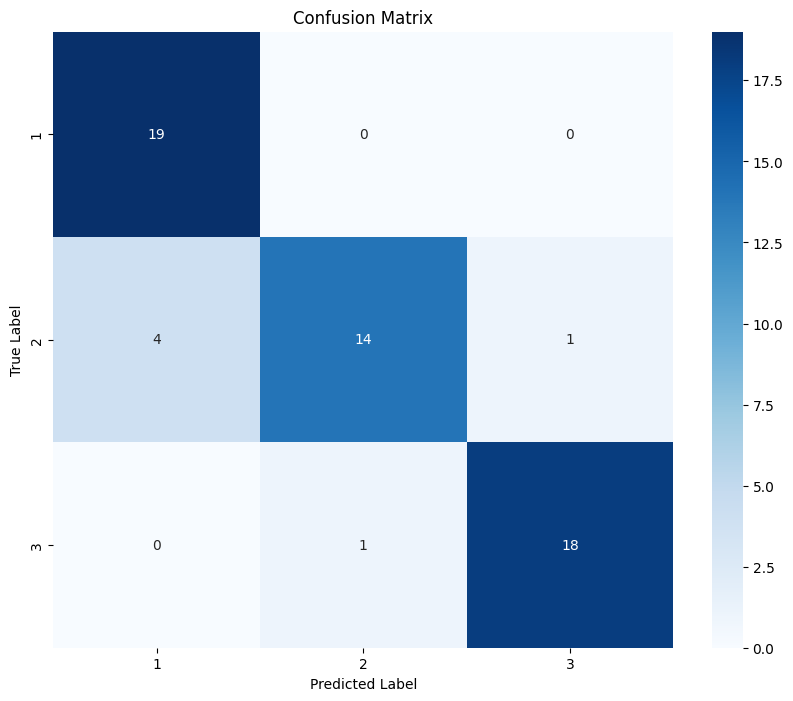

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=list(test_gen_new.class_indices.keys()),
    yticklabels=list(test_gen_new.class_indices.keys())
)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the heatmap
plt.show()
